# Huggingface Tweet emotion dataset

In [2]:
!pip install datasets
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt

train_data, test_data = load_dataset('emotion',split=['train','test']) # load dataset from huggingface hub
train_data_pd = pd.DataFrame(train_data) # convert to pandas data frame
test_data_pd = pd.DataFrame(test_data)
train_data_pd.head()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 362 kB 5.4 MB/s 
     |████████████████████████████████| 140 kB 7.3 MB/s 
     |████████████████████████████████| 101 kB 5.1 MB/s 
     |████████████████████████████████| 212 kB 50.1 MB/s 
     |████████████████████████████████| 1.1 MB 38.9 MB/s 
     |████████████████████████████████| 596 kB 44.4 MB/s 
     |████████████████████████████████| 127 kB 47.6 MB/s 
     |████████████████████████████████| 271 kB 13.4 MB/s 
     |████████████████████████████████| 144 kB 42.6 MB/s 
     |████████████████████████████████| 94 kB 3.6 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
ERROR: pip's depen

Using custom data configuration default


Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
[4666, 5362, 1304, 2159, 1937, 572]


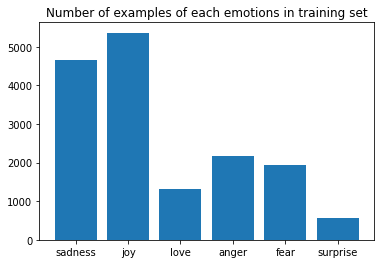

In [3]:
labels = train_data.features['label'].names
count = list(train_data_pd.iloc[:,1].value_counts().sort_index().to_numpy())
print(labels)
print(count)

plt.xticks(range(len(labels)),labels)
plt.bar(range(len(labels)), count)
plt.title("Number of examples of each emotions in training set")
plt.show()

In [4]:
import pandas as pd
import numpy as np

# text preprocessing
from nltk.tokenize import word_tokenize
import re

# plots and metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# preparing input to our model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# keras layers
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, GRU, Dense

In [5]:
X_train = train_data_pd.text
X_test = test_data_pd.text

y_train = train_data_pd.label
y_test = test_data_pd.label

data = train_data_pd.append(test_data_pd, ignore_index=True)

In [6]:
print(data.label.value_counts())
data.head(6)

1    6057
0    5247
3    2434
4    2161
2    1463
5     638
Name: label, dtype: int64


,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
5,ive been feeling a little burdened lately wasn...,0


In [7]:
# Number of labels: joy, anger, fear, sadness, neutral
num_classes = 6

# Number of dimensions for word embedding
embed_num_dims = 300

# Max input length (max number of words) 
max_seq_len = 500

class_names = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

Prepare input data

In [8]:
def clean_text(data):
    
    # remove hashtags and @usernames
    data = re.sub(r"(#[\d\w\.]+)", '', data)
    data = re.sub(r"(@[\d\w\.]+)", '', data)
    
    # tekenization using nltk
    data = word_tokenize(data)
    
    return data

In [9]:
from nltk.tokenize import word_tokenize
import re

In [10]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
texts = [' '.join(clean_text(text)) for text in data.text]

texts_train = [' '.join(clean_text(text)) for text in X_train]
texts_test = [' '.join(clean_text(text)) for text in X_test]

In [12]:
print(texts_train[69])

i was feeling brave when i bought it and clearly when i was doing my makeup


Tokenization + fitting using keras

In [13]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

sequence_train = tokenizer.texts_to_sequences(texts_train)
sequence_test = tokenizer.texts_to_sequences(texts_test)

index_of_words = tokenizer.word_index

# vacab size is number of unique words + reserved 0 index for padding
vocab_size = len(index_of_words) + 1

print('Number of unique words: {}'.format(len(index_of_words)))

Number of unique words: 16182


In [14]:
X_train_pad = pad_sequences(sequence_train, maxlen = max_seq_len )
X_test_pad = pad_sequences(sequence_test, maxlen = max_seq_len )

X_train_pad

array([[   0,    0,    0, ...,  138,    2,  642],
       [   0,    0,    0, ...,    3,   21, 1344],
       [   0,    0,    0, ...,    2,  461,  414],
       ...,
       [   0,    0,    0, ...,    3,  104, 1429],
       [   0,    0,    0, ...,  333,    8,   42],
       [   0,    0,    0, ...,   25, 3855,   12]], dtype=int32)

In [15]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

Embedding 

In [16]:
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]
    return embedding_matrix

In [17]:
import urllib.request
import zipfile
import os

fname = 'embeddings/wiki-news-300d-1M.vec'

if not os.path.isfile(fname):
    print('Downloading word vectors...')
    urllib.request.urlretrieve('https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip',
                              'wiki-news-300d-1M.vec.zip')
    print('Unzipping...')
    with zipfile.ZipFile('wiki-news-300d-1M.vec.zip', 'r') as zip_ref:
        zip_ref.extractall('embeddings')
    print('done.')
    
    os.remove('wiki-news-300d-1M.vec.zip')

Unzipping...
done.


In [18]:
embedd_matrix = create_embedding_matrix(fname, index_of_words, embed_num_dims)
embedd_matrix.shape

(16183, 300)

In [19]:
# Inspect unseen words
new_words = 0

for word in index_of_words:
    entry = embedd_matrix[index_of_words[word]]
    if all(v == 0 for v in entry):
        new_words = new_words + 1

print('Words found in wiki vocab: ' + str(len(index_of_words) - new_words))
print('New words found: ' + str(new_words))

Words found in wiki vocab: 15038
New words found: 1144


Create LSTM pipeline

In [20]:
embedd_layer = Embedding(vocab_size,
                         embed_num_dims,
                         input_length = max_seq_len,
                         weights = [embedd_matrix],
                         trainable=False)

In [21]:
lstm_output_size = 128
bidirectional = True

# Embedding Layer, LSTM or biLSTM, Dense, softmax
model = Sequential()
model.add(embedd_layer)

if bidirectional:
    model.add(Bidirectional(LSTM(units=lstm_output_size,
                              dropout=0.2,
                              recurrent_dropout=0.2)))
else:
     model.add(LSTM(units=lstm_output_size,
                dropout=0.2, 
                recurrent_dropout=0.2))

model.add(Dense(num_classes, activation='softmax'))

In [22]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 300)          4854900   
                                                                 
 bidirectional (Bidirectiona  (None, 256)              439296    
 l)                                                              
                                                                 
 dense (Dense)               (None, 6)                 1542      
                                                                 
Total params: 5,295,738
Trainable params: 440,838
Non-trainable params: 4,854,900
_________________________________________________________________


Train the model

In [23]:
batch_size = 128
epochs = 5

hist = model.fit(X_train_pad, y_train, 
                 batch_size=batch_size,
                 epochs=epochs,
                 validation_data=(X_test_pad,y_test))

Epoch 1/5
125/125 [==============================] - 994s 8s/step - loss: 1.3879 - accuracy: 0.4773 - val_loss: 1.0856 - val_accuracy: 0.6080
Epoch 2/5
125/125 [==============================] - 1007s 8s/step - loss: 0.9729 - accuracy: 0.6674 - val_loss: 0.7804 - val_accuracy: 0.7365
Epoch 3/5
125/125 [==============================] - 1018s 8s/step - loss: 0.7106 - accuracy: 0.7573 - val_loss: 0.6132 - val_accuracy: 0.7865
Epoch 4/5
125/125 [==============================] - 1025s 8s/step - loss: 0.5648 - accuracy: 0.8067 - val_loss: 0.4821 - val_accuracy: 0.8340
Epoch 5/5
125/125 [==============================] - 1022s 8s/step - loss: 0.4589 - accuracy: 0.8369 - val_loss: 0.3881 - val_accuracy: 0.8750


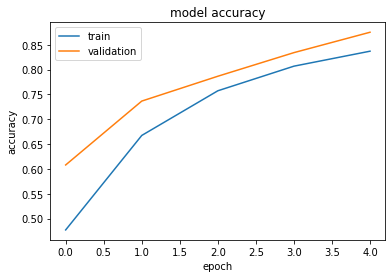

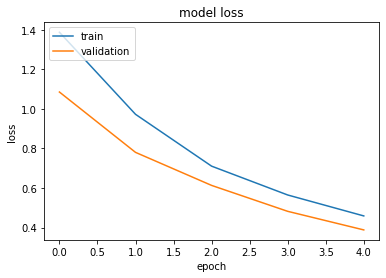

In [26]:
#  "Accuracy"
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# "Loss"
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

evaluation

In [42]:
predictions = model.predict(X_test_pad)
predictions = np.argmax(predictions, axis=1)
#predictions = [class_names[pred] for pred in predictions]

In [43]:
predictions 

array([0, 0, 0, ..., 1, 1, 4])

In [46]:
y_test

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

In [50]:
test_data_pd.label

0       0
1       0
2       0
3       1
4       0
       ..
1995    3
1996    3
1997    1
1998    1
1999    4
Name: label, Length: 2000, dtype: int64

In [51]:
print("Accuracy: {:.2f}%".format(accuracy_score(test_data_pd.label, predictions) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(test_data_pd.label, predictions, average='micro') * 100))

Accuracy: 87.50%

F1 Score: 87.50
